In [208]:
import sys
sys.path.append("../src")
import lightbeam
from lightbeam.mesh import RectMesh3D, RectMesh2D
import lightbeam.optics as optics
import lightbeam.optics2 as optics2
from lightbeam import LPmodes
from lightbeam.misc import normalize
from lightbeam.prop import Prop3D

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import Slider

%matplotlib inline

In [220]:
wl = 1.5 # um
njack = 1.4345
nclad = 1.44
ncore = 1.4522895
mm_rjack = 76.3 # um
mm_rclad = 32.8 # um
taper_ratio = 10
sm_rcore = 6.5 # um
mm_rjack = 76.3 # um
sm_rclad = 32.8 # um
sm_seperation_initial = 2*sm_rcore # um
sm_seperation_final = 2*60 # um TEMP
sm_offset = 100
sm_ex = 40000
scale_func = None
ref_val = 2e-4
l = 2
m = 2


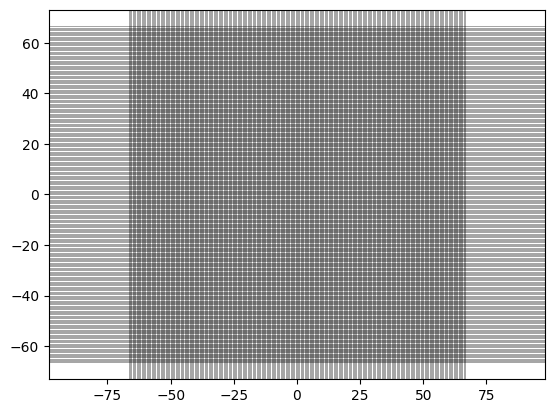

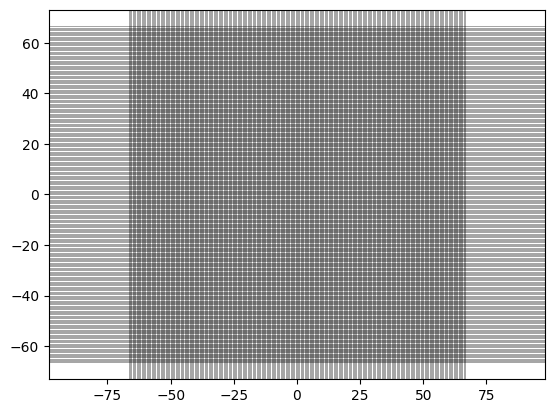

In [221]:
xw = 100 #um
yw= 100 #um
zw = sm_offset #um
num_PML = 33 #grid units

ds = 0.5 #um
dz = 0.5 #um

_mesh1 = RectMesh3D(xw,yw,zw,ds,dz,num_PML)
_mesh0 = RectMesh3D(xw,yw,zw,ds,dz,num_PML)
_mesh1.xy.plot_mesh()
_mesh0.xy.plot_mesh()

[[-66.5 -66.5 -66.5 ... -66.5 -66.5 -66.5]
 [-66.  -66.  -66.  ... -66.  -66.  -66. ]
 [-65.5 -65.5 -65.5 ... -65.5 -65.5 -65.5]
 ...
 [ 65.5  65.5  65.5 ...  65.5  65.5  65.5]
 [ 66.   66.   66.  ...  66.   66.   66. ]
 [ 66.5  66.5  66.5 ...  66.5  66.5  66.5]]
input field: 


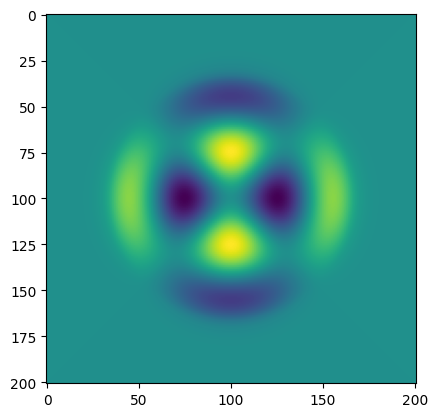

In [226]:
xg, yg = _mesh0.xg[num_PML:-num_PML,num_PML:-num_PML],_mesh0.yg[num_PML:-num_PML,num_PML:-num_PML]
# xg, yg = _mesh0.xg,_mesh0.yg
u0 = normalize(LPmodes.lpfield(xg,yg,l,m,mm_rclad,wl,nclad,njack))
xg, yg = _mesh1.xg,_mesh0.yg
u1 = normalize(LPmodes.lpfield(xg,yg,l,m,mm_rclad,wl,nclad,njack))
print("input field: ")
plt.imshow(np.real(u0))
plt.show()

In [223]:
_mesh1.xy.refine_base(u1,ref_val)

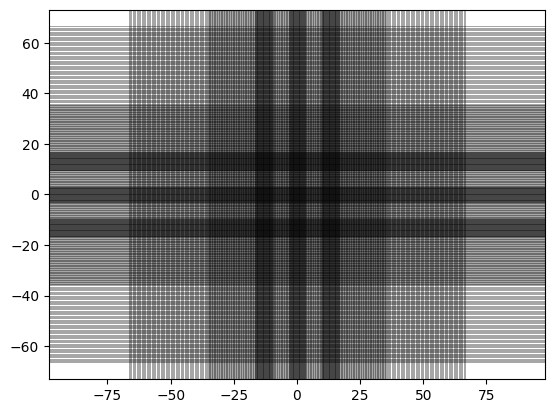

In [224]:
_mesh1.xy.plot_mesh()

input field: 


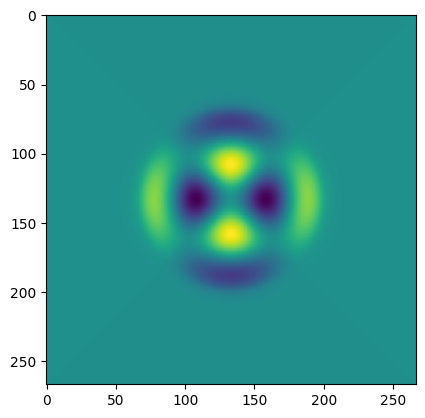

In [225]:
# xg, yg = _mesh1.xg[num_PML:-num_PML,num_PML:-num_PML],_mesh1.yg[num_PML:-num_PML,num_PML:-num_PML]
xg, yg = _mesh1.xg,_mesh1.yg
u1 = normalize(LPmodes.lpfield(xg,yg,l,m,mm_rclad,wl,nclad,njack))
print("input field: ")
plt.imshow(np.real(u1))
plt.show()

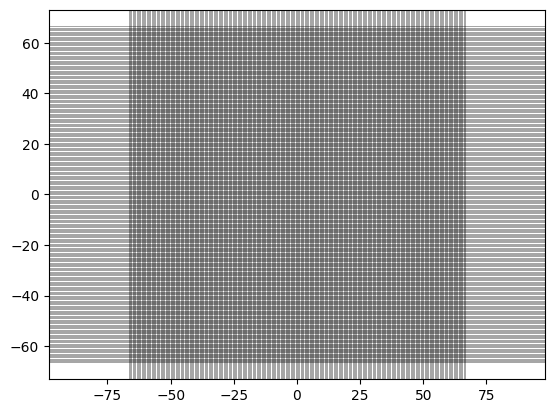

(267, 267)
(267, 267)


In [215]:
lant19_ipos = optics2.lant19.get_19port_positions(core_spacing=sm_seperation_initial)
lant19_fpos = optics2.lant19.get_19port_positions(core_spacing=sm_seperation_final)

#lant19pos = optics.lant19.get_19port_positions(core_spacing=sm_rcore)
clad_mm = optics.scaled_cyl([0,0],mm_rclad,sm_offset,nclad,njack,0,scale_func=scale_func,final_scale=1)
# clad_sm = optics.scaled_cyl([0,0],sm_rclad,sm_ex,nclad,njack,sm_offset,scale_func=scale_func,final_scale=taper_ratio)
# elmnts = [clad_mm, clad_sm]

# for i in range(0,len(lant19_ipos)):
#     core = optics2.scaled_cyl(xy=lant19_ipos[i],fxy=lant19_fpos[i] ,r = sm_rcore/taper_ratio,z_ex = sm_ex,n = ncore,nb = nclad,z_offset=sm_offset,scale_func=scale_func,final_scale=taper_ratio)
#     elmnts.append(core)

clad0 = optics.OpticSys([clad_mm],njack)
clad0.set_sampling(_mesh0.xy)
clad1 = optics.OpticSys([clad_mm],njack)
clad1.set_sampling(_mesh1.xy)
out1 = np.zeros(_mesh1.xy.shape)
out0 = np.zeros(_mesh0.xy.shape)
_mesh0.xy.plot_mesh()
print(out0.shape)
print(out1.shape)

# # fig, axs = plt.subplots(1, 1, figsize=(15, 5))
# # Generate the first subplot
# clad1.set_IORsq(out1, 0)
# plt.imshow(out1, vmin=njack*njack, vmax=ncore*ncore)
# plt.show()

# clad1.set_IORsq(out1, 100)
# plt.imshow(out1, vmin=njack*njack, vmax=ncore*ncore)
# plt.show()

# clad0.set_IORsq(out0, 100)
# plt.imshow(out0, vmin=njack*njack, vmax=ncore*ncore)
# plt.show()Fake

prop0 = Prop3D(wl,_mesh0,clad0,nclad)
prop1 = Prop3D(wl,_mesh1,clad1,nclad)

In [216]:
u0 = prop0.prop2end_uniform(u0)
u1 = prop1.prop2end_uniform(u1)


input power:  1.0
propagating field...
initial shape:  (267, 267)
 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 
final total power 0.999999986596435
'prop2end_uniform'  7.3515 s
input power:  0.9999999999999998
propagating field...
initial shape:  (267, 267)
 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 
final total power 0.9999954146673585
'prop2end_uniform'  7.8777 s


output field: 


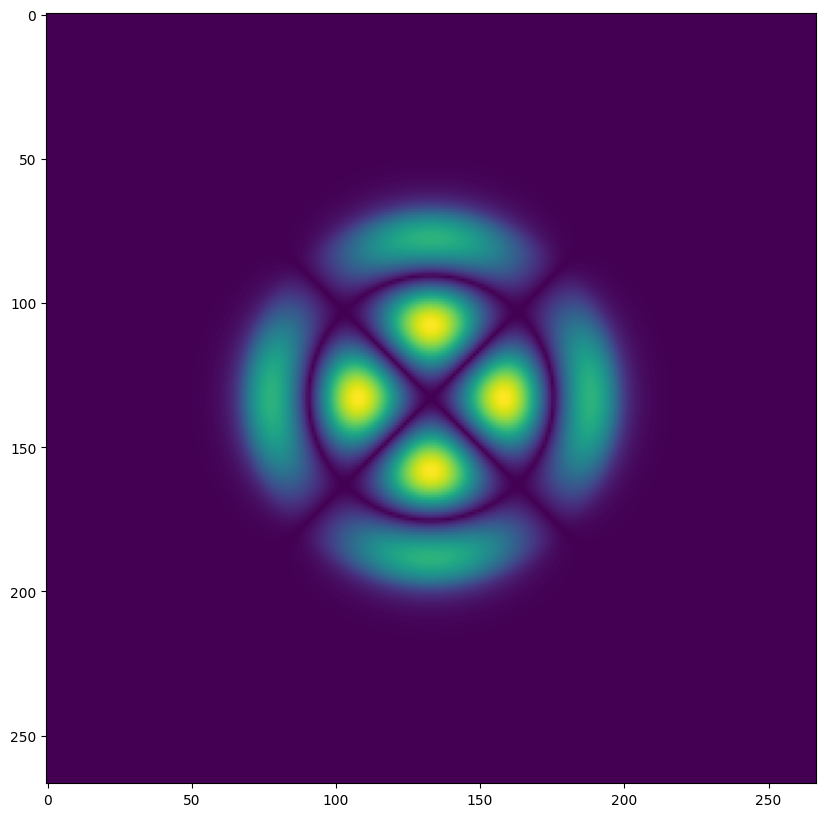

output field: 


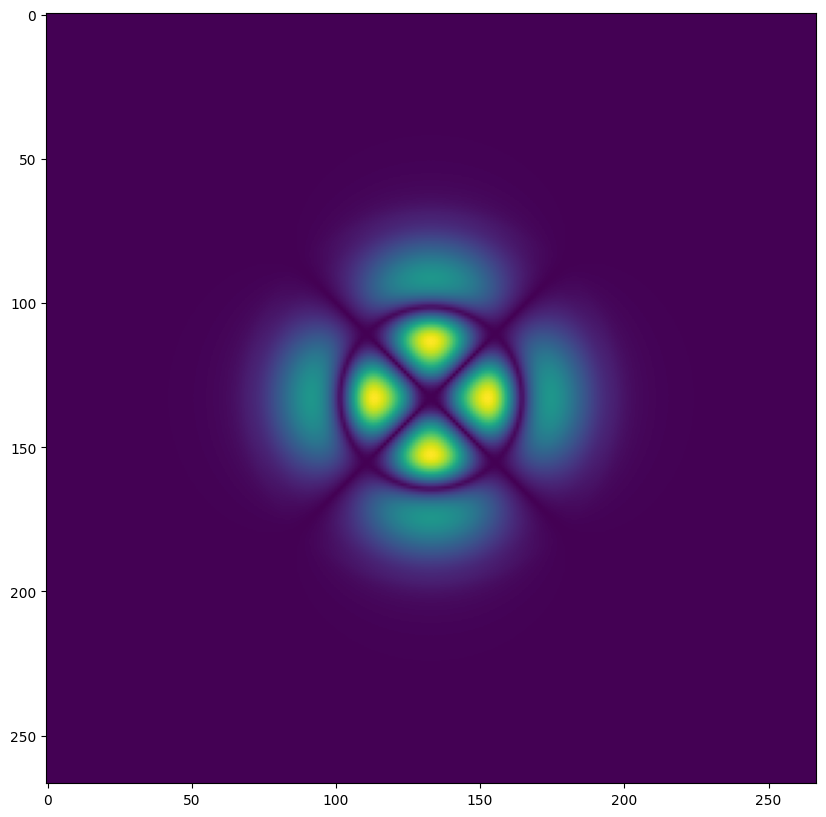

In [217]:
fig, axs = plt.subplots(1, 1, figsize=(10,10))
print("output field: ")
plt.imshow(np.abs(u0))
plt.show()
fig, axs = plt.subplots(1, 1, figsize=(10,10))
print("output field: ")
plt.imshow(np.abs(u1))
plt.show()